In [1]:
import random
import pandas as pd
import numpy as np
from functools import reduce
from operator import concat

from data_generator.household import household

pd.set_option('display.max_columns', None)

from data_generator.vehicle import vehicle

# Testing 1 Household

In [2]:
my_house = household()
my_house.driver_count

3

In [3]:
my_house.vehicles

In [4]:
for i in range(15):
    my_house.move_forward_n_years(1)
    for x in my_house.vehicles:
        print(x.summary)

{'vehicle_id': 'c377fc4aa62f4805a75388494636b60e', 'vehicle_age': 6, 'vehicle_years_owned': 1, 'vehicle_type': 'sedan', 'vehicle_claim_cnt_all_1': 0, 'vehicle_claim_cnt_all_2': 0, 'vehicle_claim_cnt_all_3': 0, 'vehicle_claim_cnt_all_4': 0, 'vehicle_claim_cnt_all_5': 0, 'vehicle_claim_cnt_all_6': 0, 'vehicle_claim_cnt_all_7': 0, 'vehicle_claim_cnt_all_8': 0, 'vehicle_claim_cnt_all_9': 0, 'vehicle_claim_cnt_all_10': 0, 'vehicle_claim_cnt_all_11': 0, 'vehicle_claim_cnt_all_12': 0, 'vehicle_claim_cnt_all_13': 0, 'vehicle_claim_cnt_all_14': 0, 'vehicle_claim_cnt_all_15': 0, 'vehicle_claim_cnt_bi_1': 0, 'vehicle_claim_cnt_bi_2': 0, 'vehicle_claim_cnt_bi_3': 0, 'vehicle_claim_cnt_bi_4': 0, 'vehicle_claim_cnt_bi_5': 0, 'vehicle_claim_cnt_bi_6': 0, 'vehicle_claim_cnt_bi_7': 0, 'vehicle_claim_cnt_bi_8': 0, 'vehicle_claim_cnt_bi_9': 0, 'vehicle_claim_cnt_bi_10': 0, 'vehicle_claim_cnt_bi_11': 0, 'vehicle_claim_cnt_bi_12': 0, 'vehicle_claim_cnt_bi_13': 0, 'vehicle_claim_cnt_bi_14': 0, 'vehicle_clai

# Generate Dataframe

In [5]:
n = 5_000
houses = [household() for i in range(n)]

for x in houses:
    years = random.randint(0, 1)
    #x.move_forward_n_years(years)

df = pd.DataFrame(reduce(concat, [x.summary_per_vehicle for x in houses if x.inforce]))
df['split'] = np.random.choice(['train', 'test', 'validation'], replace = True, size = len(df.index), p = [0.7, 0.2, 0.1])

df.head(5)

,inforce,household_tenure,min_driver_tenure,max_driver_tenure,driver_count,vehicle_count,youthful_driver_count,max_driver_age,min_driver_age,mean_driver_age,credit_score,multiline_houses,multiline_rental,multiline_personal_liability_umbrella,multiline_personal_article_policy,driver_info,garaging_location,driver_cnt_16,driver_cnt_17,driver_cnt_18,driver_cnt_19,driver_cnt_20,driver_cnt_21,driver_cnt_22,driver_cnt_23,driver_cnt_24,driver_cnt_25,driver_cnt_26,driver_cnt_27,driver_cnt_28,driver_cnt_29,driver_cnt_30,driver_cnt_31,driver_cnt_32,driver_cnt_33,driver_cnt_34,driver_cnt_35,driver_cnt_36,driver_cnt_37,driver_cnt_38,driver_cnt_39,driver_cnt_40,driver_cnt_41,driver_cnt_42,driver_cnt_43,driver_cnt_44,driver_cnt_45,driver_cnt_46,driver_cnt_47,driver_cnt_48,driver_cnt_49,driver_cnt_50,driver_cnt_51,driver_cnt_52,driver_cnt_53,driver_cnt_54,driver_cnt_55,driver_cnt_56,driver_cnt_57,driver_cnt_58,driver_cnt_59,driver_cnt_60,driver_cnt_61,driver_cnt_62,driver_cnt_63,driver_cnt_64,driver_cnt_65,driver_cnt_66,driver_cnt_67,driver_cnt_68,driver_cnt_69,driver_cnt_70,driver_cnt_71,driver_cnt_72,driver_cnt_73,driver_cnt_74,driver_cnt_75,driver_cnt_76,driver_cnt_77,driver_cnt_78,driver_cnt_79,driver_cnt_80,driver_cnt_81,driver_cnt_82,driver_cnt_83,driver_cnt_84,driver_cnt_85,driver_cnt_86,driver_cnt_87,driver_cnt_88,driver_cnt_89,driver_cnt_90,driver_cnt_91,driver_cnt_92,driver_cnt_93,driver_cnt_94,driver_cnt_95,driver_cnt_96,driver_cnt_97,driver_cnt_98,driver_cnt_16_m,driver_cnt_16_f,driver_cnt_17_m,driver_cnt_17_f,driver_cnt_18_m,driver_cnt_18_f,driver_cnt_19_m,driver_cnt_19_f,driver_cnt_20_m,driver_cnt_20_f,driver_cnt_21_m,driver_cnt_21_f,driver_cnt_22_m,driver_cnt_22_f,driver_cnt_23_m,driver_cnt_23_f,driver_cnt_24_m,driver_cnt_24_f,driver_cnt_25_m,driver_cnt_25_f,driver_cnt_26_m,driver_cnt_26_f,driver_cnt_27_m,driver_cnt_27_f,driver_cnt_28_m,driver_cnt_28_f,driver_cnt_29_m,driver_cnt_29_f,driver_cnt_30_m,driver_cnt_30_f,driver_cnt_31_m,driver_cnt_31_f,driver_cnt_32_m,driver_cnt_32_f,driver_cnt_33_m,driver_cnt_33_f,driver_cnt_34_m,driver_cnt_34_f,driver_cnt_35_m,driver_cnt_35_f,driver_cnt_36_m,driver_cnt_36_f,driver_cnt_37_m,driver_cnt_37_f,driver_cnt_38_m,driver_cnt_38_f,driver_cnt_39_m,driver_cnt_39_f,driver_cnt_40_m,driver_cnt_40_f,driver_cnt_41_m,driver_cnt_41_f,driver_cnt_42_m,driver_cnt_42_f,driver_cnt_43_m,driver_cnt_43_f,driver_cnt_44_m,driver_cnt_44_f,driver_cnt_45_m,driver_cnt_45_f,driver_cnt_46_m,driver_cnt_46_f,driver_cnt_47_m,driver_cnt_47_f,driver_cnt_48_m,driver_cnt_48_f,driver_cnt_49_m,driver_cnt_49_f,driver_cnt_50_m,driver_cnt_50_f,driver_cnt_51_m,driver_cnt_51_f,driver_cnt_52_m,driver_cnt_52_f,driver_cnt_53_m,driver_cnt_53_f,driver_cnt_54_m,driver_cnt_54_f,driver_cnt_55_m,driver_cnt_55_f,driver_cnt_56_m,driver_cnt_56_f,driver_cnt_57_m,driver_cnt_57_f,driver_cnt_58_m,driver_cnt_58_f,driver_cnt_59_m,driver_cnt_59_f,driver_cnt_60_m,driver_cnt_60_f,driver_cnt_61_m,driver_cnt_61_f,driver_cnt_62_m,driver_cnt_62_f,driver_cnt_63_m,driver_cnt_63_f,driver_cnt_64_m,driver_cnt_64_f,driver_cnt_65_m,driver_cnt_65_f,driver_cnt_66_m,driver_cnt_66_f,driver_cnt_67_m,driver_cnt_67_f,driver_cnt_68_m,driver_cnt_68_f,driver_cnt_69_m,driver_cnt_69_f,driver_cnt_70_m,driver_cnt_70_f,driver_cnt_71_m,driver_cnt_71_f,driver_cnt_72_m,driver_cnt_72_f,driver_cnt_73_m,driver_cnt_73_f,driver_cnt_74_m,driver_cnt_74_f,driver_cnt_75_m,driver_cnt_75_f,driver_cnt_76_m,driver_cnt_76_f,driver_cnt_77_m,driver_cnt_77_f,driver_cnt_78_m,driver_cnt_78_f,driver_cnt_79_m,driver_cnt_79_f,driver_cnt_80_m,driver_cnt_80_f,driver_cnt_81_m,driver_cnt_81_f,driver_cnt_82_m,driver_cnt_82_f,driver_cnt_83_m,driver_cnt_83_f,driver_cnt_84_m,driver_cnt_84_f,driver_cnt_85_m,driver_cnt_85_f,driver_cnt_86_m,driver_cnt_86_f,driver_cnt_87_m,driver_cnt_87_f,driver_cnt_88_m,driver_cnt_88_f,driver_cnt_89_m,driver_cnt_89_f,driver_cnt_90_m,driver_cnt_90_f,driver_cnt_91_m,driver_cnt_91_f,driver_cnt_92_m,driver_cnt_92_f,driver_cnt_93_m,driver_cnt_93_f,driver_cnt_94_m,driver_cnt_94_f,driv

# Checkout

<Axes: ylabel='Frequency'>

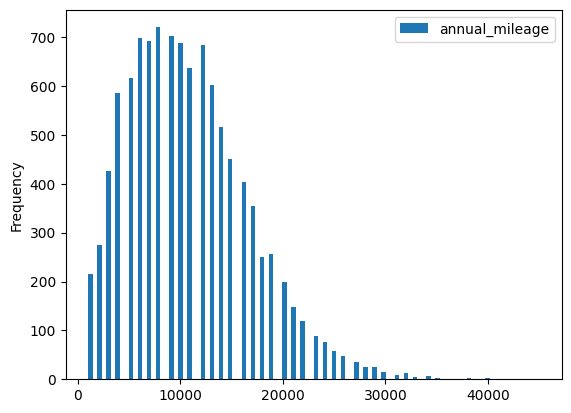

In [6]:
df[['annual_mileage']].plot.hist(bins = 100)

<Axes: ylabel='Frequency'>

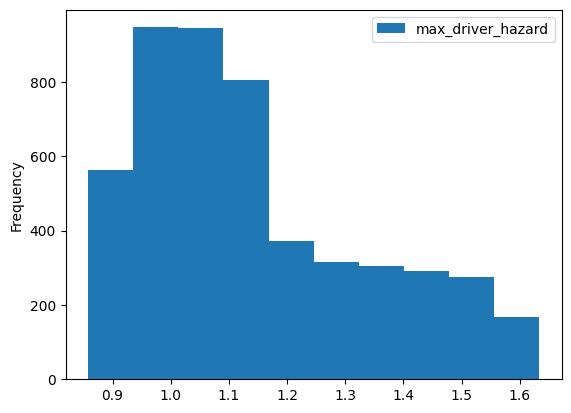

In [7]:
result_df = pd.DataFrame([x.summary_with_debugging for x in houses if x.inforce])
result_df[['max_driver_hazard']].plot.hist()

<Axes: xlabel='min_driver_age', ylabel='max_driver_hazard'>

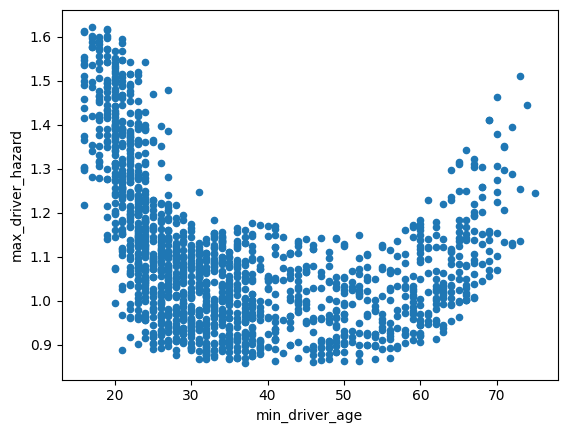

In [8]:
result_df \
    [result_df['driver_count'] == 1] \
    .plot.scatter(x = 'min_driver_age', y = 'max_driver_hazard')

In [ ]:
result_df \
    [result_df['driver_count'] == 1] \
    .plot.scatter(x = 'credit_score', y = 'min_driver_hazard')

In [ ]:
for x in houses:
  x.move_forward_n_years(random.randint(1, 30))

In [ ]:
houses[2].move_forward_n_years(1)

houses[2].summary

In [ ]:
result_df = pd.DataFrame([x.summary_with_debugging for x in houses if x.inforce])
result_df[['mean_driver_hazard']].plot.hist()

In [ ]:
result_df.plot.scatter(x = 'min_driver_age', y = 'max_driver_hazard')

In [ ]:
my_house = household()
my_house.child_count

In [ ]:
my_house.claims

In [ ]:
my_house.move_forward_n_years(12)

In [ ]:
my_house.summary_per_vehicle

In [ ]:
for i in range(50):
  print(f"Year: {i+1}")
  my_house.move_forward_n_years(1)
  #print(my_house.child_count)
  print(my_house.inforce)
  print(my_house.tenure_years)
  print("")


In [ ]:
[x.tenure_years for x in my_house.drivers]

In [ ]:
for x in my_house.drivers:
    x.tenure_years += 1